<a href="https://colab.research.google.com/github/BHAVATHARININ/Stroke-Prediction-using-Pyspark/blob/main/BDA_STROKE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=2572c64d06ee7f5ea2ea5189018f1b14b3ee56d5443e8e18888768bdf74ced90
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


**Loading of Dataset**

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("StrokePredictionAnalysis").getOrCreate()

In [ ]:
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv",header=True,inferSchema=True)

In [ ]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [ ]:
df.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

This code shows a summary statistics table of a DataFrame in PySpark.


In [ ]:
df.describe().show()

+-------+-----------------+------+------------------+------------------+-------------------+------------+---------+--------------+------------------+------------------+--------------+-------------------+
|summary|               id|gender|               age|      hypertension|      heart_disease|ever_married|work_type|Residence_type| avg_glucose_level|               bmi|smoking_status|             stroke|
+-------+-----------------+------+------------------+------------------+-------------------+------------+---------+--------------+------------------+------------------+--------------+-------------------+
|  count|             5110|  5110|              5110|              5110|               5110|        5110|     5110|          5110|              5110|              5110|          5110|               5110|
|   mean|36517.82935420744|  NULL|43.226614481409015|0.0974559686888454|0.05401174168297456|        NULL|     NULL|          NULL|106.14767710371804|28.893236911794673|          NULL| 

This code displays the data types of columns in a DataFrame.

In [ ]:
df.dtypes

[('id', 'int'),
 ('gender', 'string'),
 ('age', 'double'),
 ('hypertension', 'int'),
 ('heart_disease', 'int'),
 ('ever_married', 'string'),
 ('work_type', 'string'),
 ('Residence_type', 'string'),
 ('avg_glucose_level', 'double'),
 ('bmi', 'string'),
 ('smoking_status', 'string'),
 ('stroke', 'int')]

This code returns a list of column names in the DataFrame.

In [ ]:
df.columns

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

This code prints the count of rows and the number of columns in the DataFrame as a tuple.



In [ ]:
print((df.count(), len(df.columns)))

(5110, 12)


This code removes rows with missing (null) values from the DataFrame.

In [ ]:
df = df.dropna()

In [ ]:
print((df.count(), len(df.columns)))

(5110, 12)


This code counts and displays the number of null (missing) values in each column of the DataFrame.

In [ ]:
from pyspark.sql.functions import col, sum
nan_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
nan_counts.show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|  0|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



In [ ]:
df.dtypes

[('id', 'int'),
 ('gender', 'string'),
 ('age', 'double'),
 ('hypertension', 'int'),
 ('heart_disease', 'int'),
 ('ever_married', 'string'),
 ('work_type', 'string'),
 ('Residence_type', 'string'),
 ('avg_glucose_level', 'double'),
 ('bmi', 'string'),
 ('smoking_status', 'string'),
 ('stroke', 'int')]

These two commands group the DataFrame by the 'Smoking status' and 'Worker type' columns separately and then count the number of rows in each group, displaying the results in two separate DataFrames. This helps summarize the distribution of product names and brands in the dataset.



In [ ]:
df.groupBy('smoking_status').count().show()
df.groupBy('work_type').count().show()

+---------------+-----+
| smoking_status|count|
+---------------+-----+
|         smokes|  789|
|        Unknown| 1544|
|   never smoked| 1892|
|formerly smoked|  885|
+---------------+-----+

+-------------+-----+
|    work_type|count|
+-------------+-----+
| Never_worked|   22|
|Self-employed|  819|
|      Private| 2925|
|     children|  687|
|     Govt_job|  657|
+-------------+-----+



In [ ]:
from pyspark.ml.feature import StringIndexer
string_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in string_columns:
    indexer = StringIndexer(inputCol=col, outputCol=col + "_encode")
    df = indexer.fit(df).transform(df)
data = df.select(['ID', 'age', 'hypertension', 'heart_disease','stroke', 'avg_glucose_level'] + [col + '_encode' for col in string_columns])


In [ ]:
data.show()

+-----+----+------------+-------------+------+-----------------+-------------+-------------------+----------------+---------------------+---------------------+
|   ID| age|hypertension|heart_disease|stroke|avg_glucose_level|gender_encode|ever_married_encode|work_type_encode|Residence_type_encode|smoking_status_encode|
+-----+----+------------+-------------+------+-----------------+-------------+-------------------+----------------+---------------------+---------------------+
| 9046|67.0|           0|            1|     1|           228.69|          1.0|                0.0|             0.0|                  0.0|                  2.0|
|51676|61.0|           0|            0|     1|           202.21|          0.0|                0.0|             1.0|                  1.0|                  0.0|
|31112|80.0|           0|            1|     1|           105.92|          1.0|                0.0|             0.0|                  1.0|                  0.0|
|60182|49.0|           0|            0| 

In [ ]:
data.dtypes

[('ID', 'int'),
 ('age', 'double'),
 ('hypertension', 'int'),
 ('heart_disease', 'int'),
 ('stroke', 'int'),
 ('avg_glucose_level', 'double'),
 ('gender_encode', 'double'),
 ('ever_married_encode', 'double'),
 ('work_type_encode', 'double'),
 ('Residence_type_encode', 'double'),
 ('smoking_status_encode', 'double')]

In [ ]:
from pyspark.sql.functions import col

data = data.withColumn("age", col("age").cast("int"))
data = data.withColumn("avg_glucose_level", col("avg_glucose_level").cast("int"))
data = data.withColumn("gender_encode", col("gender_encode").cast("int"))
data = data.withColumn("ever_married_encode", col("ever_married_encode").cast("int"))
data = data.withColumn("work_type_encode", col("work_type_encode").cast("int"))
data = data.withColumn("Residence_type_encode", col("Residence_type_encode").cast("int"))
data = data.withColumn("smoking_status_encode", col("smoking_status_encode").cast("int"))

In [ ]:
data.dtypes

[('ID', 'int'),
 ('age', 'int'),
 ('hypertension', 'int'),
 ('heart_disease', 'int'),
 ('stroke', 'int'),
 ('avg_glucose_level', 'int'),
 ('gender_encode', 'int'),
 ('ever_married_encode', 'int'),
 ('work_type_encode', 'int'),
 ('Residence_type_encode', 'int'),
 ('smoking_status_encode', 'int')]

In [ ]:
data = data.withColumnRenamed("id","ID")
data = data.withColumnRenamed("ever_married_encode","Martial Status")
data = data.withColumnRenamed("age","Age")
data = data.withColumnRenamed("hypertension","Hypertension")
data = data.withColumnRenamed("avg_glucose_level","Glucose Level (avg)")
data = data.withColumnRenamed("stroke","Stroke")
data = data.withColumnRenamed("gender_encode","Gender")
data = data.withColumnRenamed("work_type_encode","Work Type")
data = data.withColumnRenamed("Residence_type_encode","Residence Type")
data = data.withColumnRenamed("smoking_status_encode","Smoking Status")

In [ ]:
data.columns

['ID',
 'Age',
 'Hypertension',
 'heart_disease',
 'Stroke',
 'Glucose Level (avg)',
 'Gender',
 'Martial Status',
 'Work Type',
 'Residence Type',
 'Smoking Status']



---


**RANDOM FOREST CLASSIFIER WITHOUT PIPELINE**

**What is Random Forest Classifier ?**

A Random Forest Classifier is an ensemble machine learning model that combines multiple decision trees to make predictions, offering high accuracy and reducing overfitting by aggregating results from individual trees. It's commonly used for classification tasks in various domains, such as image recognition and predictive modeling.

**What is Vector Assembler ?**

  

1.   It is a feature transformer in PySpark used to combine multiple input columns into a single vector column. It takes a list of input columns and assembles them into a vector, making it suitable for machine learning tasks.
2.   This is particularly useful when you need to feed multiple features into machine learning algorithms that expect a single input column.



In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'

spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)

# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
for indexer in indexers:
    df = indexer.fit(df).transform(df)
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
encoder_models = [encoder.fit(df) for encoder in encoders]
for encoder, encoder_model in zip(encoders, encoder_models):
    df = encoder_model.transform(df)
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
df = assembler.transform(df)
# Creating amodel
rf = RandomForestClassifier(featuresCol='features', labelCol=target_col, numTrees=100, maxDepth=5)
rf_model = rf.fit(df)

predictions = rf_model.transform(df)

df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()

# Accuracy Calculation
evaluator = BinaryClassificationEvaluator(labelCol=target_col)
accuracy = evaluator.evaluate(predictions)

print("Model Accuracy: {:.2f}%".format(accuracy * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      1|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      1|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      1|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 86.13%


**RANDOM FOREST CLASSIFIER WITH PIPELINE**

**What is Pipeline and why it is used ?**

A pipeline in machine learning is a sequential process that automates the execution of multiple data preprocessing and modeling stages, ensuring consistent and efficient workflow from data preparation to model training and prediction.

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.ml import Pipeline

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'

spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)

# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
# Creating a model
rf = RandomForestClassifier(featuresCol='features', labelCol=target_col, numTrees=100, maxDepth=10)

evaluator = BinaryClassificationEvaluator(labelCol=target_col)
# Creating a Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])
pipeline_model = pipeline.fit(df)
predictions = pipeline_model.transform(df)

df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()

# Accuracy Calculation
accuracy = evaluator.evaluate(predictions)
accuracy_1 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy_1 * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      1|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      0|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      0|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 95.98%


**HYPER PARAMETER TUNING**

Num trees - 50

Max depth - 2

In [ ]:

from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.ml import Pipeline

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'
spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)

# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
# Creating a model
rf = RandomForestClassifier(featuresCol='features', labelCol=target_col, numTrees=50, maxDepth=2)
evaluator = BinaryClassificationEvaluator(labelCol=target_col)
pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])
pipeline_model = pipeline.fit(df)

predictions = pipeline_model.transform(df)


df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy Calculation
accuracy = evaluator.evaluate(predictions)
accuracy_1 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy_1 * 100))
spark.stop()

Num trees - 50

Max depth - 5

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.ml import Pipeline

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'
spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)
# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
rf = RandomForestClassifier(featuresCol='features', labelCol=target_col, numTrees=50, maxDepth=5)
evaluator = BinaryClassificationEvaluator(labelCol=target_col)

pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])
pipeline_model = pipeline.fit(df)

predictions = pipeline_model.transform(df)


df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy calculation
accuracy = evaluator.evaluate(predictions)
accuracy_2 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy_2 * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      1|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      1|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      1|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 86.10%


Num trees - 50

Max depth - 10

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.ml import Pipeline

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'
spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)
# One-hot encoding of categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
rf = RandomForestClassifier(featuresCol='features', labelCol=target_col, numTrees=50, maxDepth=10)

evaluator = BinaryClassificationEvaluator(labelCol=target_col)
pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])

pipeline_model = pipeline.fit(df)
predictions = pipeline_model.transform(df)

df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy Calculation
accuracy = evaluator.evaluate(predictions)
accuracy_3 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy_3 * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      1|
|12109|     1|                      1|
|12095|     1|                      0|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      0|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      0|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 96.17%


Num trees - 100

Max depth - 2

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.ml import Pipeline

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'

spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)
# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]

assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
rf = RandomForestClassifier(featuresCol='features', labelCol=target_col, numTrees=100, maxDepth=2)
evaluator = BinaryClassificationEvaluator(labelCol=target_col)
# Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])
pipeline_model = pipeline.fit(df)
predictions = pipeline_model.transform(df)

df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy Calculation
accuracy = evaluator.evaluate(predictions)
accuracy_4 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy_4 * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      1|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      1|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      1|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 50.00%


Num trees - 100

Max depth - 5

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.ml import Pipeline

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'

spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)
# One-hot encoding of categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
rf = RandomForestClassifier(featuresCol='features', labelCol=target_col, numTrees=100, maxDepth=5)
evaluator = BinaryClassificationEvaluator(labelCol=target_col)
# Creating a Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])
pipeline_model = pipeline.fit(df)
predictions = pipeline_model.transform(df)

df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy calculation
accuracy = evaluator.evaluate(predictions)
accuracy_5 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy_5 * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      1|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      1|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      1|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 86.13%


Num trees - 100

Max depth - 10

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.ml import Pipeline

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'

spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)
# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
rf = RandomForestClassifier(featuresCol='features', labelCol=target_col, numTrees=100, maxDepth=10)
evaluator = BinaryClassificationEvaluator(labelCol=target_col)
# Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])
pipeline_model = pipeline.fit(df)
predictions = pipeline_model.transform(df)

df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy calculation
accuracy = evaluator.evaluate(predictions)
accuracy_6 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy_6 * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      1|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      0|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      0|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 95.98%


Num trees - 150

Max depth - 2

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.ml import Pipeline

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'

spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)
# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
# Creating a model
rf = RandomForestClassifier(featuresCol='features', labelCol=target_col, numTrees=150, maxDepth=2)
evaluator = BinaryClassificationEvaluator(labelCol=target_col)
# Creating Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])
pipeline_model = pipeline.fit(df)
predictions = pipeline_model.transform(df)

df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy Calculation
accuracy = evaluator.evaluate(predictions)
accuracy_7 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy_7 * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      1|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      1|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      1|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 50.00%


Num trees - 150

Max depth - 5

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.ml import Pipeline

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'
spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)
# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
rf = RandomForestClassifier(featuresCol='features', labelCol=target_col, numTrees=150, maxDepth=5)
evaluator = BinaryClassificationEvaluator(labelCol=target_col)
# Creating a Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])
pipeline_model = pipeline.fit(df)
predictions = pipeline_model.transform(df)

df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy Calculation
accuracy = evaluator.evaluate(predictions)
accuracy_8 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy_8 * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      1|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      1|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      1|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 85.84%


Num trees - 150

Max depth - 10

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.ml import Pipeline

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'
spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)
# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
rf = RandomForestClassifier(featuresCol='features', labelCol=target_col, numTrees=150, maxDepth=10)
evaluator = BinaryClassificationEvaluator(labelCol=target_col)
pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])
pipeline_model = pipeline.fit(df)
predictions = pipeline_model.transform(df)


df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy Calculation
accuracy = evaluator.evaluate(predictions)
accuracy_9 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy_9 * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      0|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      1|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      0|
|58202|     1|                      1|
|56112|     1|                      0|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      0|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 96.12%


**MODEL ACCURACY CHART FOR RANDOM FOREST CLASSIFIER**

In [ ]:
from tabulate import tabulate
method_accuracies = [
    ["Method 1", "50", "2" , accuracy_1*100],
    ["Method 2", "50", "5" , accuracy_2*100],
    ["Method 3", "50", "10" , accuracy_3*100],
    ["Method 4", "100", "2" , accuracy_4*100],
    ["Method 5", "100", "5" , accuracy_5*100],
    ["Method 6", "100", "10" , accuracy_6*100],
    ["Method 7", "150", "2" , accuracy_7*100],
    ["Method 8", "150", "5" , accuracy_8*100],
    ["Method 9", "150", "10" , accuracy_9*100],
]

headers = ["Method","Number Of Trees", "Max Depth", "Accuracy"]
table = tabulate(method_accuracies, headers, tablefmt="pretty")
print(table)


+----------+-----------------+-----------+-------------------+
|  Method  | Number Of Trees | Max Depth |     Accuracy      |
+----------+-----------------+-----------+-------------------+
| Method 1 |       50        |     2     |       50.0        |
| Method 2 |       50        |     5     | 86.09587496251213 |
| Method 3 |       50        |    10     | 96.17284195411557 |
| Method 4 |       100       |     2     |       50.0        |
| Method 5 |       100       |     5     | 86.13437498192741 |
| Method 6 |       100       |    10     | 95.98058971124237 |
| Method 7 |       150       |     2     |       50.0        |
| Method 8 |       150       |     5     | 85.8390153909197  |
| Method 9 |       150       |    10     | 96.11864450189195 |
+----------+-----------------+-----------+-------------------+


**Line Chart for Accuracy table**

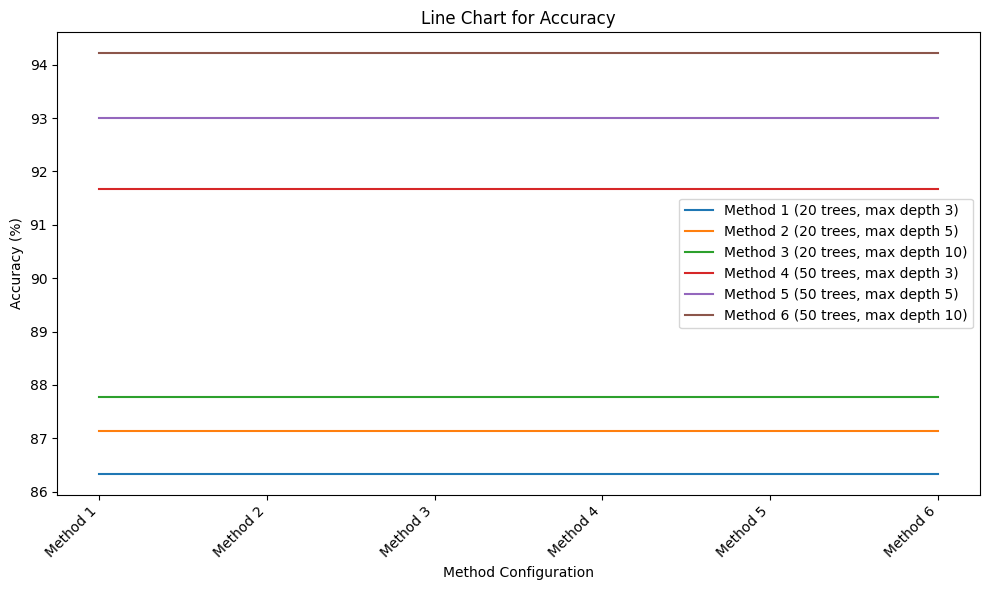

In [ ]:
import matplotlib.pyplot as plt
method_names = [row[0] for row in method_accuracies]
accuracy_values = [row[3] for row in method_accuracies]
num_trees = [int(row[1]) for row in method_accuracies]
max_depth = [int(row[2]) for row in method_accuracies]
plt.figure(figsize=(10, 6))
x_values = range(len(method_accuracies))

for method, accuracy, n_trees, depth in zip(method_names, accuracy_values, num_trees, max_depth):
    plt.plot(x_values, [accuracy] * len(x_values), label=f"{method} ({n_trees} trees, max depth {depth})")
plt.xlabel('Method Configuration')
plt.ylabel('Accuracy (%)')
plt.title('Line Chart for Accuracy')
plt.xticks(x_values, method_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


**GBT WITHOUT PIPELINE**

**What is GBT ?**

GBT stands for Gradient Boosted Trees, a machine learning algorithm used for both classification and regression tasks. It builds an ensemble of decision trees in a sequential manner, where each tree corrects the errors of the previous one, resulting in a powerful predictive model.

In [ ]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'
spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)
# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
for indexer in indexers:
    df = indexer.fit(df).transform(df)

encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
encoder_models = [encoder.fit(df) for encoder in encoders]
for encoder, encoder_model in zip(encoders, encoder_models):
    df = encoder_model.transform(df)
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
df = assembler.transform(df)
# Creating a model
gbt = GBTClassifier(featuresCol='features', labelCol=target_col, maxDepth=3, maxIter=100)
gbt_model = gbt.fit(df)
predictions = gbt_model.transform(df)


df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy Calculation
evaluator = BinaryClassificationEvaluator(labelCol=target_col)
accuracy = evaluator.evaluate(predictions)
accuracy_g1 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      1|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      1|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      1|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 87.77%


**GBT WITH PIPELINE**

In [ ]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder, VectorIndexer
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.sql.functions import when

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'
spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)
# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
# Creating a model
gbt = GBTClassifier(featuresCol='features', labelCol=target_col, maxDepth=5, maxIter=100)
# Creating Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, gbt])
model = pipeline.fit(df)
predictions = model.transform(df)

df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy Calculation
evaluator = BinaryClassificationEvaluator(labelCol=target_col)
accuracy = evaluator.evaluate(predictions)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      0|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      1|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      0|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 94.21%


**HYPER PARAMETER TUNING**

Max depth - 3

Max iter - 20

In [ ]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'
spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)
# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
for indexer in indexers:
    df = indexer.fit(df).transform(df)

encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
encoder_models = [encoder.fit(df) for encoder in encoders]
for encoder, encoder_model in zip(encoders, encoder_models):
    df = encoder_model.transform(df)
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
df = assembler.transform(df)
# Creating a model
gbt = GBTClassifier(featuresCol='features', labelCol=target_col, maxDepth=3, maxIter=20)
gbt_model = gbt.fit(df)
predictions = gbt_model.transform(df)

df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy Calculation
evaluator = BinaryClassificationEvaluator(labelCol=target_col)
accuracy = evaluator.evaluate(predictions)
accuracy_g1 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      1|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      1|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      1|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 86.34%


Max depth - 3

Max iter - 50

In [ ]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'
spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)
# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
for indexer in indexers:
    df = indexer.fit(df).transform(df)

encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
encoder_models = [encoder.fit(df) for encoder in encoders]
for encoder, encoder_model in zip(encoders, encoder_models):
    df = encoder_model.transform(df)
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
df = assembler.transform(df)
# Creating a model
gbt = GBTClassifier(featuresCol='features', labelCol=target_col, maxDepth=3, maxIter=50)
gbt_model = gbt.fit(df)
predictions = gbt_model.transform(df)


df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy Calculation
evaluator = BinaryClassificationEvaluator(labelCol=target_col)
accuracy = evaluator.evaluate(predictions)
accuracy_g2 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      1|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      1|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      1|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 87.14%


Max depth - 3

Max iter - 100

In [ ]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'
spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)
# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
for indexer in indexers:
    df = indexer.fit(df).transform(df)

encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
encoder_models = [encoder.fit(df) for encoder in encoders]
for encoder, encoder_model in zip(encoders, encoder_models):
    df = encoder_model.transform(df)
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
df = assembler.transform(df)
# Creating a model
gbt = GBTClassifier(featuresCol='features', labelCol=target_col, maxDepth=3, maxIter=100)
gbt_model = gbt.fit(df)
predictions = gbt_model.transform(df)


df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy Calculation
evaluator = BinaryClassificationEvaluator(labelCol=target_col)
accuracy = evaluator.evaluate(predictions)
accuracy_g3 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      1|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      1|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      1|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 87.77%


Max depth - 5

Max iter - 20

In [ ]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'
spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)
# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
for indexer in indexers:
    df = indexer.fit(df).transform(df)

encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
encoder_models = [encoder.fit(df) for encoder in encoders]
for encoder, encoder_model in zip(encoders, encoder_models):
    df = encoder_model.transform(df)
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
df = assembler.transform(df)
# Creating a model
gbt = GBTClassifier(featuresCol='features', labelCol=target_col, maxDepth=5, maxIter=20)
gbt_model = gbt.fit(df)
predictions = gbt_model.transform(df)


df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy Calculation
evaluator = BinaryClassificationEvaluator(labelCol=target_col)
accuracy = evaluator.evaluate(predictions)
accuracy_g4 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      1|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      1|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      0|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 91.67%


Max depth - 5

Max iter - 50

In [ ]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'
spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)
# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
for indexer in indexers:
    df = indexer.fit(df).transform(df)

encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
encoder_models = [encoder.fit(df) for encoder in encoders]
for encoder, encoder_model in zip(encoders, encoder_models):
    df = encoder_model.transform(df)
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
df = assembler.transform(df)
# Creating a model
gbt = GBTClassifier(featuresCol='features', labelCol=target_col, maxDepth=5, maxIter=50)
gbt_model = gbt.fit(df)
predictions = gbt_model.transform(df)


df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy Calculation
evaluator = BinaryClassificationEvaluator(labelCol=target_col)
accuracy = evaluator.evaluate(predictions)
accuracy_g5 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      0|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      1|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      0|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 93.01%


Max depth - 5

Max iter - 100

In [ ]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_col = 'stroke'
spark = SparkSession.builder.appName("StrokePrediction").getOrCreate()
df = spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True, inferSchema=True)
# One-hot encoding for categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]
for indexer in indexers:
    df = indexer.fit(df).transform(df)

encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]
encoder_models = [encoder.fit(df) for encoder in encoders]
for encoder, encoder_model in zip(encoders, encoder_models):
    df = encoder_model.transform(df)
# Vector Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [col + "_encoded" for col in categorical_cols], outputCol='features')
df = assembler.transform(df)
# Creating a model
gbt = GBTClassifier(featuresCol='features', labelCol=target_col, maxDepth=5, maxIter=100)
gbt_model = gbt.fit(df)
predictions = gbt_model.transform(df)

df_with_predictions = df_with_predictions.select(['ID', target_col, 'Stroke_Prediction_Label'])
df_with_predictions.show()
# Accuracy Calculation
evaluator = BinaryClassificationEvaluator(labelCol=target_col)
accuracy = evaluator.evaluate(predictions)
accuracy_g6 = accuracy
print("Model Accuracy: {:.2f}%".format(accuracy * 100))
spark.stop()


+-----+------+-----------------------+
|   ID|stroke|Stroke_Prediction_Label|
+-----+------+-----------------------+
| 9046|     1|                      1|
|51676|     1|                      1|
|31112|     1|                      1|
|60182|     1|                      1|
| 1665|     1|                      1|
|56669|     1|                      1|
|53882|     1|                      1|
|10434|     1|                      1|
|27419|     1|                      1|
|60491|     1|                      0|
|12109|     1|                      1|
|12095|     1|                      1|
|12175|     1|                      1|
| 8213|     1|                      1|
| 5317|     1|                      1|
|58202|     1|                      1|
|56112|     1|                      1|
|34120|     1|                      1|
|27458|     1|                      1|
|25226|     1|                      0|
+-----+------+-----------------------+
only showing top 20 rows

Model Accuracy: 94.21%


**ACCURACY CHART FOR GBT MODEL**

In [ ]:
from tabulate import tabulate
method_accuracies = [
    ["Method 1", "20", "3" , accuracy_g1*100],
    ["Method 2", "20", "5" , accuracy_g2*100],
    ["Method 3", "20", "10" , accuracy_g3*100],
    ["Method 4", "50", "3" , accuracy_g4*100],
    ["Method 5", "50", "5" , accuracy_g5*100],
    ["Method 6", "50", "10" , accuracy_g6*100],
]

headers = ["Method","Max Iters", "Max Depth", "Accuracy"]
table = tabulate(method_accuracies, headers, tablefmt="pretty")
print(table)


+----------+-----------+-----------+-------------------+
|  Method  | Max Iters | Max Depth |     Accuracy      |
+----------+-----------+-----------+-------------------+
| Method 1 |    20     |     3     | 86.34025920592472 |
| Method 2 |    20     |     5     | 87.13752355647655 |
| Method 3 |    20     |    10     | 87.7743023110752  |
| Method 4 |    50     |     3     | 91.66883539093615 |
| Method 5 |    50     |     5     | 93.00724808305452 |
| Method 6 |    50     |    10     | 94.21111725238762 |
+----------+-----------+-----------+-------------------+


**CHARTS**

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("StrokePredictionCharts").getOrCreate()

In [ ]:
df1 = spark.read.option("header", "true").csv("/content/healthcare-dataset-stroke-data.csv")


In [ ]:
df1.printSchema()

root
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: string (nullable = true)
 |-- hypertension: string (nullable = true)
 |-- heart_disease: string (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: string (nullable = true)
 |-- bmi: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: string (nullable = true)



Bar Chart for Gender Counts

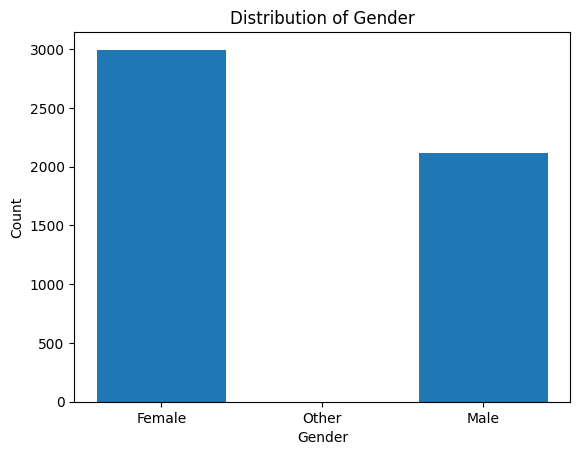

In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
gender_counts = df1.groupBy('gender').count().toPandas()
plt.bar(gender_counts['gender'], gender_counts['count'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()
spark.stop()
